In [14]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import lognorm
from scipy.integrate import simpson


In [15]:
# buy stock profit/loss

def buy_stock(x, stock_price):
         
    # Calculate the profit 
    profits = x - stock_price
    
    return profits

In [16]:
# Sell Call Option profit/loss
def sell_call(x, call_price, strike_price):
    
    profits = np.minimum(0, strike_price - x) + call_price
    
    return profits

In [17]:
# Covered Write Strategy profit/loss
def covered_write(x, stock_price, call_price, strike_price):
    # Profit from stock: (Stock price - Buy price)
    stock_profit = buy_stock(x, stock_price)
    
    # Profit from selling the call: sell_call(x, call_price, strike_price)
    call_profit = sell_call(x, call_price, strike_price)
    
    # Total profit from covered write strategy
    return stock_profit + call_profit

Break-even Point: 3.0000
Break-even Probability: 62.11%
Max Profit Point: 3.6000
Max Profit: 3.6000
Max Profit Probability: 47.75%
Expected Profit: 0.0141
Expected Profit Rate: 0.35%


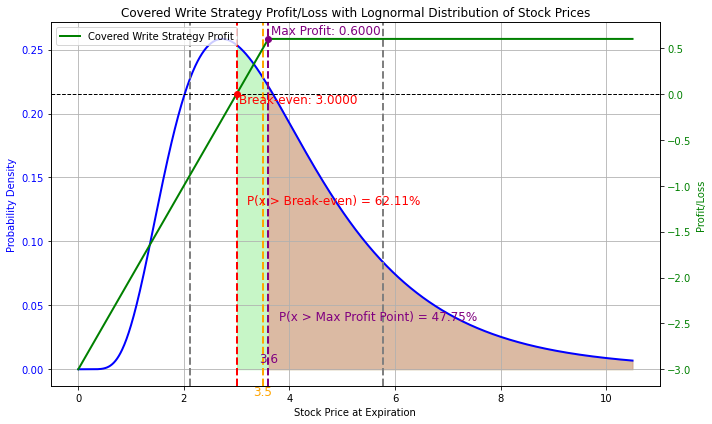

In [18]:
# Assume stock price follow lognormal distribution
#which means the log of price follow normal distribution

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm
from scipy.integrate import simpson

def covered_write_profit_possibility_lognorm(stock_price, call_price, strike_price, sigma):
    # Parameters
    mu = np.log(stock_price)  # Mean of the log of the stock price (lognormal)
    num_simulations = 10000  # Number of simulations
    
    # Generate a range of stock prices (x) based on lognormal distribution
    x_range = np.linspace(0, stock_price * 3, 1000)  # Adjusted range for lognormal distribution
    
    # Calculate the lognormal distribution curve for the stock prices
    pdf = lognorm.pdf(x_range, sigma, scale=np.exp(mu))  # Lognormal distribution
    
    # Calculate the profit for the covered write strategy for each stock price in the range
    profits = covered_write(x_range, stock_price, call_price, strike_price)
    
    # Break-even Point
    break_even_x = stock_price - call_price
    probability_x_above_break_even = 1 - lognorm.cdf(break_even_x, sigma, scale=np.exp(mu))
    
    # Max Profit Point
    max_profit_x = strike_price
    max_profit = strike_price - stock_price + call_price
    max_profit_probability = 1 - lognorm.cdf(strike_price, sigma, scale=np.exp(mu))
    
    # Calculate the expected profit using numerical integration (simpson method)
    expected_profit = simpson(profits * pdf, x_range)
    cost = stock_price + call_price
    expected_profit_rate = expected_profit / cost
    
     # Prepare the data to return
    data = {
        'Break-even Point': break_even_x,
        'Break-even Probability (%)': probability_x_above_break_even * 100,
        'Max Profit Point': max_profit_x,
        'Max Profit': max_profit,
        'Max Profit Probability (%)': max_profit_probability * 100,
        'Expected Profit': expected_profit,
        'Expected Profit Rate (%)': expected_profit_rate * 100,
    }
    
    # Print the results
    print(f"Break-even Point: {break_even_x:.4f}")
    print(f"Break-even Probability: {probability_x_above_break_even*100:.2f}%")
    print(f"Max Profit Point: {max_profit_x:.4f}")
    print(f"Max Profit: {max_profit_x:.4f}")
    print(f"Max Profit Probability: {max_profit_probability*100:.2f}%")
    print(f"Expected Profit: {expected_profit:.4f}")
    print(f"Expected Profit Rate: {expected_profit_rate*100:.2f}%")

    
    # Plotting the lognormal distribution curve of stock prices
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot the lognormal distribution curve
    ax1.plot(x_range, pdf, color='blue', label='Lognormal Distribution of Stock Prices', linewidth=2)
    ax1.set_xlabel("Stock Price at Expiration")
    ax1.set_ylabel("Probability Density", color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Add vertical dashed lines at 1 sigma and 2 sigma (lognormal is skewed, so these don't correspond directly)
    ax1.axvline(stock_price * np.exp(-sigma), color='grey', linestyle='--', linewidth=2)
    ax1.axvline(stock_price * np.exp(sigma), color='grey', linestyle='--', linewidth=2)

    # Profit/Loss Curve    
    
    # Create a second y-axis to plot the profit range
    ax2 = ax1.twinx()    
    # Add a horizontal line at y = 0 on the second y-axis
    ax2.axhline(0, color='black', linestyle='--', linewidth=1)
    # Plot the profit range for the covered write strategy
    ax2.plot(x_range, profits, color='green', label='Covered Write Strategy Profit', linewidth=2)
    ax2.set_ylabel("Profit/Loss", color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    # Break-even Point Ploting
    
    # Plot break-even point and other important values
    ax2.scatter(break_even_x, 0, color='red', zorder=5)
    ax2.text(break_even_x + 0.05, -0.1, f"Break-even: {break_even_x:.4f}", fontsize=12, color="red")
    # Shade the area where x > break-even
    ax1.fill_between(x_range, pdf, where=(x_range >= break_even_x), 
                     color='lightgreen', alpha=0.5, label=f"Area where x > Break-even (P = {probability_x_above_break_even*100:.2f}%)")
    # Add vertical dashed lines at the break-even point
    ax1.axvline(break_even_x, color='red', linestyle='--', linewidth=2, label=f"Break-even Point: {break_even_x:.2f}")
    # Annotate the probability of x > break-even
    ax1.text(break_even_x + 0.2, max(pdf) * 0.5, 
             f"P(x > Break-even) = {probability_x_above_break_even*100:.2f}%", fontsize=12, color="red")
       
    # Current Stock Price Ploting
    
    # Add vertical dashed line for the current stock price (buy price)
    ax1.axvline(stock_price, color='orange', linestyle='--', linewidth=2, label=f"Current Stock Price: {stock_price}")
    # Annotate the current stock price on the x-axis
    ax1.text(stock_price, -0.02, f"{stock_price}", fontsize=12, color='orange', ha='center')

    # Max Profit Point Ploting
    
    # Plot Max Profit point 
    ax2.scatter(max_profit_x, max_profit, color='purple', zorder=5)
    ax2.text(max_profit_x + 0.05, max_profit + 0.05, f"Max Profit: {max_profit:.4f}", fontsize=12, color="purple")
    
    # Shade the area where x > strike price (max profit region)
    ax1.fill_between(x_range, pdf, where=(x_range >= max_profit_x), 
                     color='lightcoral', alpha=0.5, label=f"Area where x > Strike Price (P = {max_profit_probability*100:.2f}%)")
    # Add vertical dashed lines at the strike price (max profit point)
    ax1.axvline(max_profit_x, color='purple', linestyle='--', linewidth=2, label=f"Max Profit Point (Strike Price): {max_profit_x}")
    # Annotate the strike price (max profit point) on the x-axis
    ax1.text(max_profit_x, max(pdf) * 0.02, f"{max_profit_x}", fontsize=12, color='purple', ha='center')
    # Annotate the probability of x > strike price
    ax1.text(max_profit_x + 0.2, max(pdf) * 0.15, 
             f"P(x > Max Profit Point) = {max_profit_probability*100:.2f}%", fontsize=12, color="purple")

    # Title and grid
    plt.title("Covered Write Strategy Profit/Loss with Lognormal Distribution of Stock Prices")
    ax1.grid(True)

    # Show the plot
    fig.tight_layout()
    plt.legend(loc='upper left')
    plt.show()
    
    return data

# Example Usage:
stock_price = 3.5  # Current stock price
call_price = 0.5     # Call premium received
strike_price = 3.6 # Strike price of the call option
sigma = 0.5        # Volatility of the stock

# Call the function
results = covered_write_profit_possibility_lognorm(stock_price, call_price, strike_price, sigma)

# If needed, you can access the results like:
#print(results['Break-even Point'])
# print(results['Expected Profit'])
